In [1]:
import pandas as pd
import numpy as np


#ML libraries
#import tensorflow as tf
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline

#Metrics Libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [2]:
df = pd.read_csv('OverSampled_Data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,1,0,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,0,1,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,0,1,0,0,0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0,0


In [3]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER,isFraud
count,199170.000000,1.991700e+05,1.991700e+05,1.991700e+05,1.991700e+05,1.991700e+05,199170.000000,199170.000000,199170.000000,199170.000000,199170.000000,199170.000000,199170.000000
mean,6.009223,1.906158e+05,5.682215e+05,5.142954e+05,6.999431e+05,1.134943e+06,0.203203,0.101346,0.298991,0.005965,0.350896,0.088106,0.500000
std,3.609673,5.112169e+05,2.049029e+06,2.035253e+06,2.050515e+06,2.985611e+06,0.402384,0.301787,0.457817,0.077001,0.477252,0.283449,0.500001
min,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,-1.994883e+05,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,8.184547e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,8.000000,3.845069e+04,1.244824e+04,0.000000e+00,6.214141e+03,6.014157e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,9.000000,1.907055e+05,1.072250e+05,4.545693e+04,4.187566e+05,8.984940e+05,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
max,10.000000,1.000000e+07,3.379739e+07,3.400874e+07,3.400874e+07,3.894623e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
# Select the features to standardize
features_to_standardize = ['step', 'amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

# Create a StandardScaler object
scaler = StandardScaler()
# Fit the scaler on the selected features
scaler.fit(df[features_to_standardize])

# Transform the selected features using the scaler
df[features_to_standardize] = scaler.transform(df[features_to_standardize])

In [5]:
df

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER,isFraud
0,-1.387726,-0.353620,-0.194281,-0.173934,-0.341351,-0.380139,0,0,0,0,1,0,0
1,-1.387726,-0.369221,-0.266943,-0.243170,-0.341351,-0.380139,0,0,0,0,1,0,0
2,-1.387726,-0.372514,-0.277225,-0.252694,-0.341351,-0.380139,0,0,0,0,0,1,1
3,-1.387726,-0.372514,-0.277225,-0.252694,-0.331021,-0.380139,0,0,1,0,0,0,1
4,-1.387726,-0.350043,-0.257033,-0.238010,-0.341351,-0.380139,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199165,-1.387726,-0.267784,-0.275508,-0.252694,-0.309098,-0.358502,0,0,1,0,0,0,1
199166,-1.387726,0.216986,-0.221155,-0.197468,0.407447,1.467315,0,0,0,0,0,0,1
199167,-1.110692,2.290279,0.387121,-0.252694,-0.341351,-0.380139,1,0,0,0,0,1,1
199168,-1.110692,-0.352687,-0.272129,-0.252544,-0.341351,-0.380139,0,0,0,0,0,0,1


In [6]:
#Create a Dataframe with only the dummy variables
cat = df.drop('isFraud',axis=1)
index_dict = dict(zip(cat.columns,range(cat.shape[1])))

In [7]:
import pickle
with open('cat', 'wb') as fid:
    pickle.dump(index_dict, fid,2) 

In [8]:
index_dict

{'step': 0,
 'amount': 1,
 'oldbalanceOrg': 2,
 'newbalanceOrig': 3,
 'oldbalanceDest': 4,
 'newbalanceDest': 5,
 'isFlaggedFraud': 6,
 'type__CASH_IN': 7,
 'type__CASH_OUT': 8,
 'type__DEBIT': 9,
 'type__PAYMENT': 10,
 'type__TRANSFER': 11}

# Data Splitting

In [9]:
#In this module we create the independent and dependent feature, then split them into train and test data where training size is 70%. Later we collect all the numerical features and apply StandardScaler() function which transforms the distribution so that the mean becomes 0 and standard deviation becomes 1

#Splitting dependent and independent variable
#df3=df2.copy()
X = df.drop('isFraud',axis=1)
y=df['isFraud']

# Train-test split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=111)

# Grid Search CV

In [10]:
def gs_cv(parameters,model):
    from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

    parameters = parameters
    rf_clf = model
    clf = GridSearchCV(rf_clf, parameters,n_jobs=-1)
    clf.fit(X_train, y_train)
    return clf

### Metrics Evaluation

In [13]:
columns = ['Model_Name', 'Accuracy', 'Precision','Recall','f1_score','Model_Training_Time(in sec)','Pred_time','Pred_time_for_1_rec']
metrics_df = pd.DataFrame({col: [] for col in columns})

In [14]:
def eva_metrics(Mod_name,y_true, y_pred,exe_time,Pred_time,pred_time_1_rec):
    # calculate accuracy
    acc = accuracy_score(y_true, y_pred)

    # calculate precision
    prec = precision_score(y_true, y_pred)

    # calculate recall
    rec = recall_score(y_true, y_pred)

    # calculate F1 score
    f1 = f1_score(y_true, y_pred)

    Metrics = list([acc,prec,rec,f1])
    Metrics = [num * 100 for num in Metrics]
    Metrics = ["{:.2f}".format(num) for num in Metrics]
    Metrics.insert(0, Mod_name)
    Metrics.append(exe_time)
    Metrics.append(Pred_time)
    Metrics.append(pred_time_1_rec)

    # Adding record to DataFame
    if not data_df.empty:
        if data_df['Model_Name'].str.contains(Metrics[0]).any():
            # Replace old record with new record
            data_df.loc[data_df['Model_Name'] == Metrics[0]] = Metrics
        else:
            # Add new record to DataFrame
            data_df.loc[len(data_df)] = Metrics
    else:
        # Add new record to DataFrame
        data_df.loc[len(data_df)] = Metrics

    print('\nAcc:',acc)
    print('Confusion Matrix:\n','--------------\n',confusion_matrix(y_true,y_pred))

    return Metrics

# Model Building

### Naive Bayes

In [15]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
import time
# Record to predict on single record
rec = [-1.387726,0.216986,-0.221155,-0.197468,0.407447,1.467315,0,0,0,0,0,0]
rec = np.array(rec).reshape(1,12)

# instantiate the model
st_time = time.time()
gnb = GaussianNB(var_smoothing=0)
# fit the model
gnb.fit(X_train, y_train)
ed_time = time.time()
execution_time = ed_time - st_time

ts_st_time = time.time()
pred_test = gnb.predict(X_test)
ts_ed_time = time.time()
ts_time = ts_ed_time - ts_st_time

tr_st_time = time.time()
pred_train = gnb.predict(X_train)
tr_ed_time = time.time()
tr_time = tr_ed_time - tr_st_time

rec_st_time = time.time()
gnb.predict(rec)
rec_ed_time = time.time()
rec_time = rec_ed_time - rec_st_time

print("Model Training time:", execution_time, "seconds")

# Model predicting on test data
n = eva_metrics('Naive Bayes train',pred_train,y_train,execution_time,tr_time,rec_time)
n = eva_metrics('Naive Bayes test',pred_test, y_test,execution_time,ts_time,rec_time)

c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


Model Training time: 0.12002706527709961 seconds

Acc: 0.6155760692588528
Confusion Matrix:
 --------------
 [[17442  1507]
 [52089 68381]]

Acc: 0.613378855584007
Confusion Matrix:
 --------------
 [[ 7582   629]
 [22472 29068]]


In [ ]:
# Hyper Parameter tuning With Grid Search
parameters = {'var_smoothing':[0.000001,0.00001,0.0001,0,1,2,3,4,5,6,7,8,11,12,13,14,15,16,19,20,21,22,23,24,25,26,27,28,29,30] }
rf_clf = GaussianNB() 
gs_clf = gs_cv(parameters,rf_clf)
gs_clf.best_estimator_

In [29]:
gs_clf.best_score_

0.6154397877892053

### KNN

In [16]:
st_time = time.time()
knn_model=KNeighborsClassifier( n_neighbors=7)
knn_model.fit(X_train, y_train)
ed_time = time.time()
execution_time = ed_time - st_time

ts_st_time = time.time()
pred_test = knn_model.predict(X_test)
ts_ed_time = time.time()
ts_time = ts_ed_time - ts_st_time

tr_st_time = time.time()
pred_train = knn_model.predict(X_train) 
tr_ed_time = time.time()
tr_time = tr_ed_time - tr_st_time 

rec_st_time = time.time()
knn_model.predict(rec)
rec_ed_time = time.time()
rec_time = rec_ed_time - rec_st_time

print("Model Training time:", execution_time, "seconds")

n = eva_metrics('KNN Train',pred_train,y_train,execution_time,tr_time,rec_time )
n = eva_metrics('KNN Test',pred_test, y_test,execution_time,ts_time,rec_time)

c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Model Training time: 2.138636350631714 seconds

Acc: 0.9791276655262195
Confusion Matrix:
 --------------
 [[66905   284]
 [ 2626 69604]]

Acc: 0.9742096366588007
Confusion Matrix:
 --------------
 [[28718   205]
 [ 1336 29492]]


In [28]:
with open('KNN.pkl', 'wb') as fid:
    pickle.dump(knn_model, fid) 

In [20]:
#parameters = {'n_neighbors' : [5,7,9,11,13,15,16,17,18,19,20,21,22,23,24,25,26],
               #'weights' : ['uniform','distance'],
               #'metric' : ['minkowski','euclidean','manhattan']}
parameters = {'n_neighbors' : [5,7,9,11,13,15,16,17,18,19,20,21,22,23,24,25,26]}


rf_clf = KNeighborsClassifier() 
gs_clf = gs_cv(parameters,rf_clf)
gs_clf.best_estimator_

KNeighborsClassifier()

In [21]:
gs_clf.best_score_

0.9287973737607892

### Decision Tree Model

In [32]:
st_time = time.time()
dt_clf = DecisionTreeClassifier(criterion='entropy' ,max_depth=27, max_leaf_nodes=195, random_state=41)
dt_clf.fit(X_train, y_train)
ed_time = time.time()
execution_time = ed_time - st_time

ts_st_time = time.time()
pred_test = dt_clf.predict(X_test)
ts_ed_time = time.time()
ts_time = ts_ed_time - ts_st_time 

tr_st_time = time.time()
pred_train = dt_clf.predict(X_train)
tr_ed_time = time.time()
tr_time = tr_ed_time - tr_st_time 

print("Model Training time:", execution_time, "seconds")

rec_st_time = time.time()
dt_clf.predict(rec)
rec_ed_time = time.time()
rec_time = rec_ed_time - rec_st_time

n = eva_metrics('Decision Tree Train',pred_train,y_train,execution_time,tr_time,rec_time)
n = eva_metrics('Decision Tree Test',pred_test, y_test,execution_time,ts_time,rec_time)

Model Training time: 2.117464303970337 seconds


c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(



Acc: 0.9610956899705205
Confusion Matrix:
 --------------
 [[66083  1976]
 [ 3448 67912]]

Acc: 0.9605194892135697
Confusion Matrix:
 --------------
 [[28537   842]
 [ 1517 28855]]


In [34]:
with open('DT.pkl', 'wb') as fid:
    pickle.dump(dt_clf, fid,2) 

In [26]:
# Hyper Parameter tuning With Grid Search
parameters = { 'max_depth':list(range(25)),'max_leaf_nodes':list(range(150,200))}
rf_clf = DecisionTreeClassifier()
gs_clf = gs_cv(parameters,rf_clf)
gs_clf.best_estimator_

DecisionTreeClassifier(max_depth=25, max_leaf_nodes=149)

In [33]:
gs_clf.best_score_

0.9564980303041286

C:\Users\abdul\AppData\Local\Temp\ipykernel_1780\3124612335.py:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, err, 'rs-' , color="orange" ,linewidth=1.5) #,drawstyle-"steps-post")
C:\Users\abdul\AppData\Local\Temp\ipykernel_1780\3124612335.py:17: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "rs-" (-> color='r'). The keyword argument will take precedence.
  ax.plot(errIndex, errTest, 'rs-' , color="green" ,linewidth=1.5 ) #,drawstyLe="steps-post")


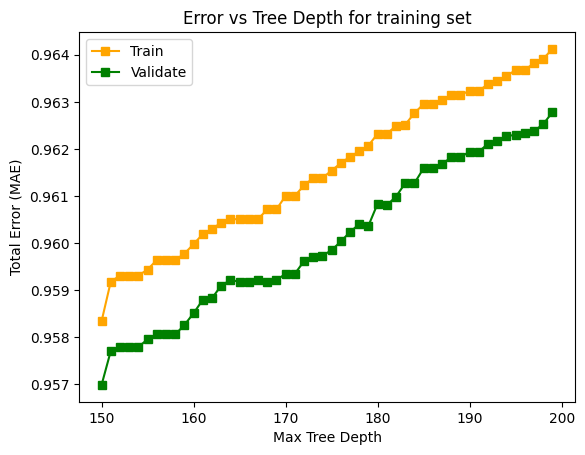

In [77]:
def getTotalabsolutetrror(X_t, y_t, modelInput):
    predictedValues = modelInput.predict(X_t)
    errors = accuracy_score(predictedValues, y_t)
    return (abs(errors))
import matplotlib.pyplot as plt
err=[]
errIndex=[]
errTest=[]
for treedepth in range(150,200):
    clf2 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=treedepth)
    model2 = clf2.fit(X_train, y_train)
    err.append(getTotalabsolutetrror(X_train, y_train, model2) )
    errTest. append(getTotalabsolutetrror(X_test, y_test, model2))
    errIndex.append(treedepth)
fig, ax = plt.subplots()
ax.plot(errIndex, err, 'rs-' , color="orange" ,linewidth=1.5) #,drawstyle-"steps-post")
ax.plot(errIndex, errTest, 'rs-' , color="green" ,linewidth=1.5 ) #,drawstyLe="steps-post")
ax.set_xlabel("Max Tree Depth")
ax.set_ylabel("Total Error (MAE)")
ax.set_title("Error vs Tree Depth for training set")
plt.legend(["Train", "Validate"])


### Random Forest Model

In [33]:
st_time = time.time()
rf_clf = RandomForestClassifier(max_depth=30,max_leaf_nodes=700, n_estimators=36)
rf_clf.fit(X_train, y_train)
ed_time= time.time()
execution_time = ed_time - st_time

ts_st_time = time.time()
pred_test = rf_clf.predict(X_test)
ts_ed_time = time.time()
ts_time = ts_ed_time - ts_st_time 

tr_st_time = time.time()
pred_train = rf_clf.predict(X_train)
tr_ed_time = time.time()
tr_time = tr_ed_time - tr_st_time 

print("Model Training time:", execution_time, "seconds")

rec_st_time = time.time()
rf_clf.predict(rec)
rec_ed_time = time.time()
rec_time = rec_ed_time - rec_st_time

n = eva_metrics('RandomForest Train',pred_train,y_train,execution_time,tr_time,rec_time)
n = eva_metrics('RandomForest Test',pred_test, y_test,execution_time,ts_time,rec_time)

Model Training time: 19.975754737854004 seconds


c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



Acc: 0.9814515955501044
Confusion Matrix:
 --------------
 [[68011  1066]
 [ 1520 68822]]

Acc: 0.9782765142005991
Confusion Matrix:
 --------------
 [[29332   576]
 [  722 29121]]


In [71]:
with open('RF.pkl', 'wb') as fid:
    pickle.dump(rf_clf, fid,2) 

In [79]:
parameters = { 'max_depth':list(range(20,35)),'n_estimators':list(range(30,40))}
rf_clf = RandomForestClassifier()
gs_clf = gs_cv(parameters,rf_clf)
gs_clf.best_estimator_

RandomForestClassifier(max_depth=30, n_estimators=36)

In [81]:
gs_clf.best_score_

0.9881938676342787

### XGBoost

In [34]:
import xgboost as xgb# fit model no training data
st_time = time.time()
xgb_clf = xgb.XGBClassifier(subsample = 0.5, n_estimators = 200,max_depth = 7,learning_rate = 0.5, reg_lambda=1, colsample_bytree = 1, alpha = 1)
xgb_clf.fit(X_train, y_train)
ed_time = time.time()
execution_time = ed_time - st_time

ts_st_time = time.time()
pred_test = xgb_clf.predict(X_test)
ts_ed_time = time.time()
ts_time = ts_ed_time - ts_st_time 

tr_st_time = time.time()
pred_train = xgb_clf.predict(X_train)
tr_ed_time = time.time()
tr_time = tr_ed_time - tr_st_time 

rec_st_time = time.time()
xgb_clf.predict(rec)
rec_ed_time = time.time()
rec_time = rec_ed_time - rec_st_time

print("Model Training time:", execution_time, "seconds")

n = eva_metrics('XGB Classifier Train',pred_train,y_train,execution_time,tr_time,rec_time)
n = eva_metrics('XGB Classifier Test',pred_test, y_test,execution_time,ts_time,rec_time)

Model Training time: 21.54061222076416 seconds

Acc: 0.995474074552249
Confusion Matrix:
 --------------
 [[69009   109]
 [  522 69779]]

Acc: 0.9880838814413148
Confusion Matrix:
 --------------
 [[29510   168]
 [  544 29529]]


In [72]:
with open('XGB.pkl', 'wb') as fid:
    pickle.dump(xgb_clf, fid,2) 

In [39]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
# Define the hyperparameters and their range of values
param_distributions = {'learning_rate': [0.01, 0.1, 0.5],
                       'max_depth': [3, 5, 7],
                       'n_estimators': [50, 100, 200],
                       'subsample': [0.5, 0.7, 1],
                       'colsample_bytree': [0.5, 0.7, 1],
                       'gamma': [0, 0.1, 0.5],
                       'alpha': [0, 0.1, 0.5],
                       'lambda': [0, 0.1, 0.5]}

# Define the evaluation metric
scoring = 'accuracy'

# Define the XGBoost model
xgb = XGBClassifier()

# Define the randomized search parameters
n_iter = 50
cv = 5
verbose = 1
random_state = 42

# Perform randomized search
random_search = RandomizedSearchCV(xgb, param_distributions=param_distributions, n_iter=n_iter, cv=cv, scoring=scoring, verbose=verbose, random_state=random_state)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           n_estimators=100, n_jobs=None,
                                           num_parallel_tree=None,
                                           predictor=None, random_state=None, ...),
                   n_iter=50,
                   param_distributions={'alpha': [0, 0.1, 0.5],
                                        'colsample_bytree': [0.5, 0.7, 1],
                                        'gamma': [0, 0.1, 0.5],
                                        'lambda': [0, 0.1, 0.5],
                                        'learning_rate': [0.01, 0.1, 0.5],
                                        'max_depth': [3, 5, 7],
                                        'n_estimators': [50, 100, 200],
                                        'subsample': [0.5, 0.7, 1]},
                   random_state=42, scoring='accuracy', verbose=1)

In [41]:
random_search.best_estimator_

XGBClassifier(alpha=0.5, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.5, gpu_id=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0, learning_rate=0.5,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None, ...)

In [44]:
random_search.best_params_

{'subsample': 0.5,
 'n_estimators': 200,
 'max_depth': 7,
 'learning_rate': 0.5,
 'lambda': 0,
 'gamma': 0.5,
 'colsample_bytree': 1,
 'alpha': 0.5}

In [42]:
random_search.best_score_

0.9854467493745369

### Logistic Regression

In [35]:
st_time = time.time()
log_reg = LogisticRegression(C= 20 ,penalty='l1',solver='liblinear',random_state=42,max_iter=1000)
log_reg.fit(X_train, y_train)
ed_time = time.time()
execution_time = ed_time - st_time

ts_st_time = time.time()
pred_test = log_reg.predict(X_test)
ts_ed_time = time.time()
ts_time = ts_ed_time - ts_st_time 

tr_st_time = time.time()
pred_train = log_reg.predict(X_train)
tr_ed_time = time.time()
tr_time = tr_ed_time - tr_st_time 

rec_st_time = time.time()
log_reg.predict(rec)
rec_ed_time = time.time()
rec_time = rec_ed_time - rec_st_time

print("Model Training time:", execution_time, "seconds")

n = eva_metrics('Log_Reg Train',pred_train,y_train,execution_time,tr_time,rec_time)
n = eva_metrics('Log_Reg Test',pred_test, y_test,execution_time,ts_time,rec_time)

In [38]:
with open('log_reg.pkl', 'wb') as fid:
    pickle.dump(log_reg, fid) 

In [24]:
import seaborn as sns
# Create a scatter plot of each feature against the target variable
#sns.pairplot(X_train, x_vars=['step', 'amount', 'oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest'], y_vars=y_train, height=4, aspect=1)
#plt.show()

In [40]:
#corr = X_train.corr()
#sns.heatmap(corr, annot=True, cmap='YlGnBu')

In [17]:
params = { 'C': [10,15,20],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']}
# Define the performance metric
scoring = 'roc_auc' 
# Use grid search to find the best hyperparameters
gs_clf = GridSearchCV(LogisticRegression(), params, scoring=scoring, cv=5)
gs_clf.fit(X_train, y_train)

c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [10, 15, 20], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='roc_auc')

In [ ]:
# Print the best hyperparameters and their performance
print("Best hyperparameters: ", gs_clf.best_params_)
print("Validation {} score: {:.3f}".format(scoring, gs_clf.best_score_))

### SVC Model

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

In [17]:
from sklearn.svm import SVC
st_time = time.time()
svc = SVC(kernel='rbf', random_state=42)
svc.fit(X_train, y_train)
ed_time = time.time()
execution_time = ed_time - st_time

In [ ]:
ts_st_time = time.time()
pred_test = svc.predict(X_test)
ts_ed_time = time.time()
ts_time = ts_ed_time - ts_st_time

tr_st_time = time.time()
pred_train = svc.predict(X_train)
tr_ed_time = time.time()
tr_time = tr_ed_time - tr_st_time

rec_st_time = time.time()
svc.predict(rec)
rec_ed_time = time.time()
rec_time = rec_ed_time - rec_st_time


print("Model Training time:", execution_time, "seconds")

eva_metrics('Support Vector Classifier Train',pred_train,y_train,execution_time,tr_time,rec_time)
eva_metrics('Support Vector Classifier Test',pred_test, y_test,execution_time,ts_time,rec_time)

c:\Users\abdul\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Model Training time: 1245.0975737571716 seconds

Acc: 0.9242786133884191
Confusion Matrix:
 --------------
 [[66354  7380]
 [ 3177 62508]]

Acc: 0.924955230874797
Confusion Matrix:
 --------------
 [[28695  3125]
 [ 1359 26572]]


['Support Vector Classifier Test',
 '92.50',
 '89.48',
 '95.13',
 '92.22',
 1245.0975737571716,
 16703.38523030281,
 293.677316904068,
 0.007985591888427734]

## ANN

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import ReLU
from keras.layers import Dropout

st_time = time.time()
#Define the architecture of the neural network
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=X_train.shape[1]))    
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=128, activation='relu'))                ###From giri Bro 
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))
ed_time = time.time()

Epoch 1/10
4357/4357 [==============================] - 24s 5ms/step - loss: 0.2240 - accuracy: 0.9177 - val_loss: 0.2009 - val_accuracy: 0.9281
Epoch 2/10
4357/4357 [==============================] - 21s 5ms/step - loss: 0.1901 - accuracy: 0.9306 - val_loss: 0.1861 - val_accuracy: 0.9315
Epoch 3/10
4357/4357 [==============================] - 22s 5ms/step - loss: 0.1787 - accuracy: 0.9344 - val_loss: 0.1805 - val_accuracy: 0.9336
Epoch 4/10
4357/4357 [==============================] - 20s 5ms/step - loss: 0.1705 - accuracy: 0.9383 - val_loss: 0.1621 - val_accuracy: 0.9396
Epoch 5/10
4357/4357 [==============================] - 21s 5ms/step - loss: 0.1637 - accuracy: 0.9404 - val_loss: 0.1623 - val_accuracy: 0.9408
Epoch 6/10
4357/4357 [==============================] - 20s 5ms/step - loss: 0.1585 - accuracy: 0.9426 - val_loss: 0.1508 - val_accuracy: 0.9445
Epoch 7/10
4357/4357 [==============================] - 21s 5ms/step - loss: 0.1537 - accuracy: 0.9440 - val_loss: 0.1598 - val_ac

In [21]:
for i in range(len(pred_train)):
    if pred_train[i]>0.5:
        pred_train[i] = int(1)
    else:
        pred_train[i] = int(0)
for i in range(len(pred_test)):
    if pred_test[i]>0.5:
        pred_test[i] = int(1)
    else:
        pred_test[i] = int(0)
len(pred_train),len(y_train)

(139419, 139419)

In [22]:
ts_st_time = time.time()
pred_train = np.ravel(pred_train)
ts_ed_time = time.time()
ts_time = ts_ed_time - ts_st_time

tr_st_time = time.time()
pred_test = np.ravel(pred_test)
tr_ed_time = time.time()
tr_time = tr_ed_time - tr_st_time

execution_time = ed_time - st_time

rec_st_time = time.time()
model.predict(rec)
rec_ed_time = time.time()
rec_time = rec_ed_time - rec_st_time

print("Model Training time:", execution_time, "seconds")

n = eva_metrics('ANN Train',pred_train,y_train,execution_time,tr_time,rec_time)
n = eva_metrics('ANN Test',pred_test, y_test,execution_time,ts_time,rec_time)

1/1 [==============================] - 0s 272ms/step
Model Training time: 212.70086121559143 seconds

Acc: 0.9242786133884191
Confusion Matrix:
 --------------
 [[66354  7380]
 [ 3177 62508]]

Acc: 0.924955230874797
Confusion Matrix:
 --------------
 [[28695  3125]
 [ 1359 26572]]


In [ ]:
# Define the hyperparameters to search over
param_grid = {
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'sgd'],
    'num_hidden_layers': [1, 2, 3],
    'num_neurons': [32, 64, 128]
}

# Perform grid search using cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

In [43]:
test_pred = model.predict(X_test)
j =  eva_metrics('Support Vector Classifier Train',pred_train,y_train)

1868/1868 [==============================] - 3s 1ms/step

Acc: 0.9089435442801914
Confusion Matrix:
 --------------
 [[66103  9267]
 [ 3428 60621]]
